Project: Capstone Project - Inferential Statistics 2 - 6 Hours

At this point, you have obtained the data set for your Capstone project, cleaned and wrangled it into a form that's ready for analysis. It's now time to apply the inferential statistics techniques you have learned to explore the data. For example, are there variables that are particularly significant in terms of explaining the answer to your project question? Are there strong correlations between pairs of independent variables, or between an independent and a dependent variable? Submission: Write a short report (1-2 pages) on the inferential statistics steps you performed and your findings. Check this report into your github and submit a link to it. Eventually, this report can be incorporated into your Milestone report.

**Import necessary modules and the ASOS/SNOTEL dataframes**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dtb
import os
from glob import glob
import datetime as dt
import seaborn as sns

In [2]:
data = [pd.read_csv('asos_df.dat', parse_dates = True, index_col = 'Date_Time')]
asos_df= pd.concat(data)
#print(asos_df.head())

data = [pd.read_csv('snotel_df.dat', parse_dates = True, index_col = 'Date_Time')]
snotel_df= pd.concat(data)
#print(snotel_df.head())

asos_snotel_df = pd.merge(snotel_df, asos_df, on='Date_Time', how='outer')
#asos_snotel_filled_df = pd.merge(snotel_df, asos_df, on='Date_Time', how='outer')
print(asos_snotel_df.head())

                     TOBS.I-1 (degC)   SNWD.I-1 (in)   Temperature_degC  \
Date_Time                                                                 
2005-01-01 00:00:00              -2.1             NaN               NaN   
2005-01-01 01:00:00               NaN             NaN               NaN   
2005-01-01 02:00:00               NaN             NaN               NaN   
2005-01-01 03:00:00              -4.2             NaN               NaN   
2005-01-01 04:00:00               NaN             NaN               NaN   

                     Dewpoint_degC  Pressure_hp  WindDirection_deg  \
Date_Time                                                            
2005-01-01 00:00:00            NaN          NaN                NaN   
2005-01-01 01:00:00            NaN          NaN                NaN   
2005-01-01 02:00:00            NaN          NaN                NaN   
2005-01-01 03:00:00            NaN          NaN                NaN   
2005-01-01 04:00:00            NaN          NaN       

## Determining Outliers Statistically (Snow Depth)

-33.1
-3.0
-45.0
0.0
0.0
0.0


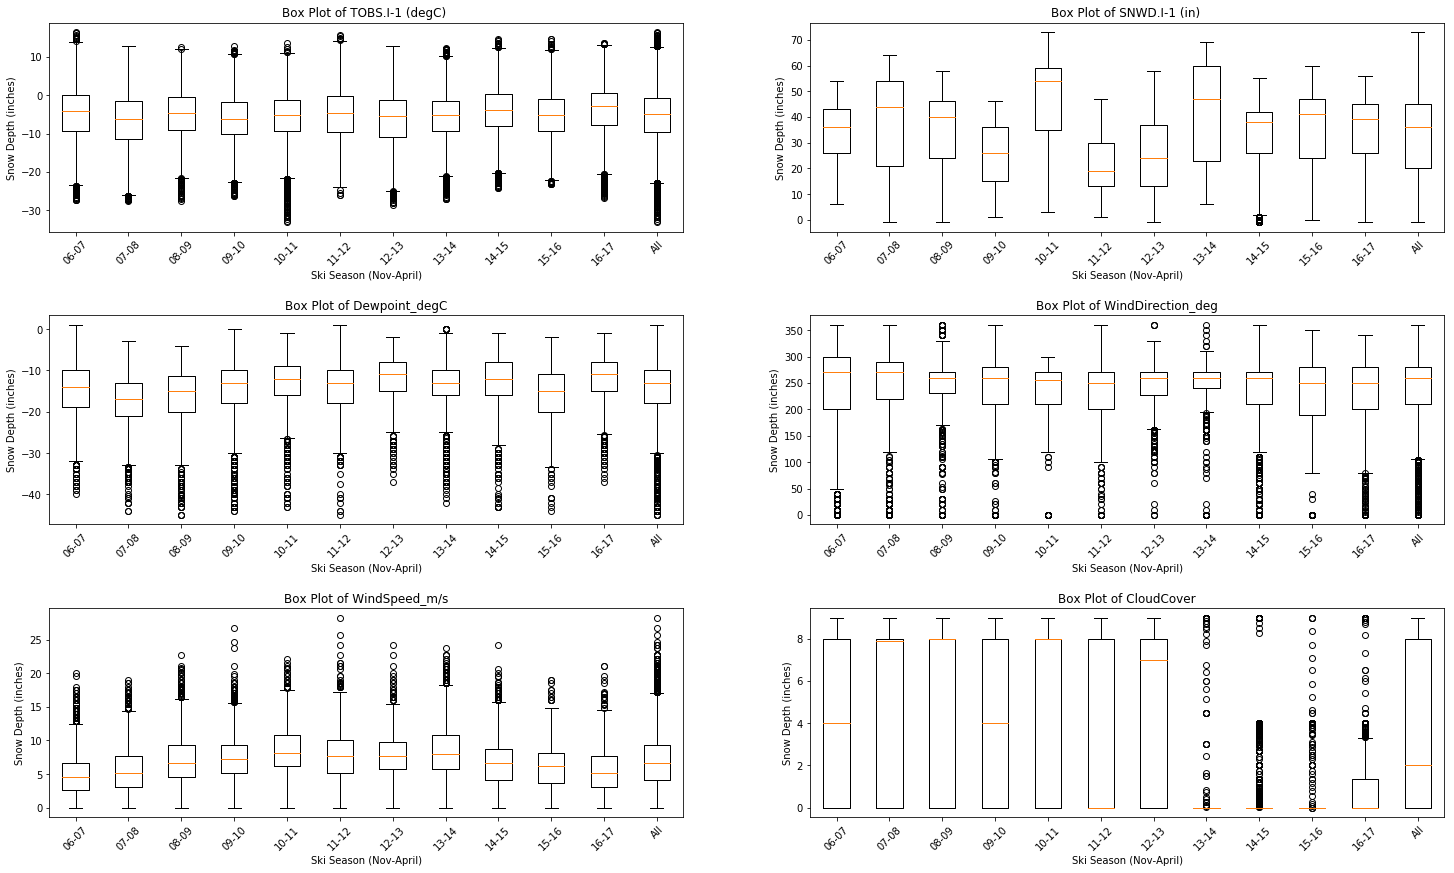

In [15]:


fig = plt.figure(figsize=(25,20))
fig.subplots_adjust(hspace=0.4, wspace=0.2)
years = ['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']
keys = ['TOBS.I-1 (degC) ', 'SNWD.I-1 (in) ', 'Dewpoint_degC', 'WindDirection_deg', 'WindSpeed_m/s', 'CloudCover']


for k in range(len(keys)):
    ax = plt.subplot(4, 2, k+1)
#fig.suptitle = 'Boxplot by Ski Season (November - April)'



    filtered_data = asos_snotel_df[keys[k]][~np.isnan(asos_snotel_df[keys[k]])]

    merged_seasons =  pd.concat([filtered_data['11-2006':'04-2007'], filtered_data['11-2007':'04-2008'], \
                 filtered_data['11-2008':'04-2009'],filtered_data['11-2009':'04-2010'],filtered_data['11-2010':'04-2011'], \
                 filtered_data['11-2011':'04-2012'],filtered_data['11-2012':'04-2013'],filtered_data['11-2013':'04-2014'], \
                 filtered_data['11-2014':'04-2015'],filtered_data['11-2015':'04-2016'],filtered_data['11-2016':'04-2017']], axis = 0)

    filtered_data2 = [filtered_data['11-2006':'04-2007'] , filtered_data['11-2007':'04-2008'], \
                 filtered_data['11-2008':'04-2009'],filtered_data['11-2009':'04-2010'],filtered_data['11-2010':'04-2011'], \
                 filtered_data['11-2011':'04-2012'],filtered_data['11-2012':'04-2013'],filtered_data['11-2013':'04-2014'], \
                 filtered_data['11-2014':'04-2015'],filtered_data['11-2015':'04-2016'],filtered_data['11-2016':'04-2017'], merged_seasons]
    print(filtered_data.min())
    plot =ax.boxplot(filtered_data2)
    plt.title('Box Plot of ' + keys[k])
    labels = ['06-07', '07-08', '08-09', '09-10', '10-11', '11-12', '12-13', '13-14', '14-15', '15-16', '16-17', 'All']
    ax.set_xticklabels(labels, rotation = 45)
    ax.set_xlabel('Ski Season (Nov-April)')
    ax.set_ylabel('Snow Depth (inches)')

       TOBS.I-1 (degC)   SNWD.I-1 (in) 
count      95090.000000    82932.000000
mean           1.358249       21.443942
std            9.107234       21.196144
min          -33.100000       -3.000000
25%           -5.000000        0.000000
50%            1.300000       18.000000
75%            7.700000       40.000000
max           25.100000      187.000000
0
AxesSubplot(0.125,0.657941;0.369048x0.222059)
1
AxesSubplot(0.530952,0.657941;0.369048x0.222059)
2
AxesSubplot(0.125,0.391471;0.369048x0.222059)
3
AxesSubplot(0.530952,0.391471;0.369048x0.222059)
4
AxesSubplot(0.125,0.125;0.369048x0.222059)
5
AxesSubplot(0.530952,0.125;0.369048x0.222059)


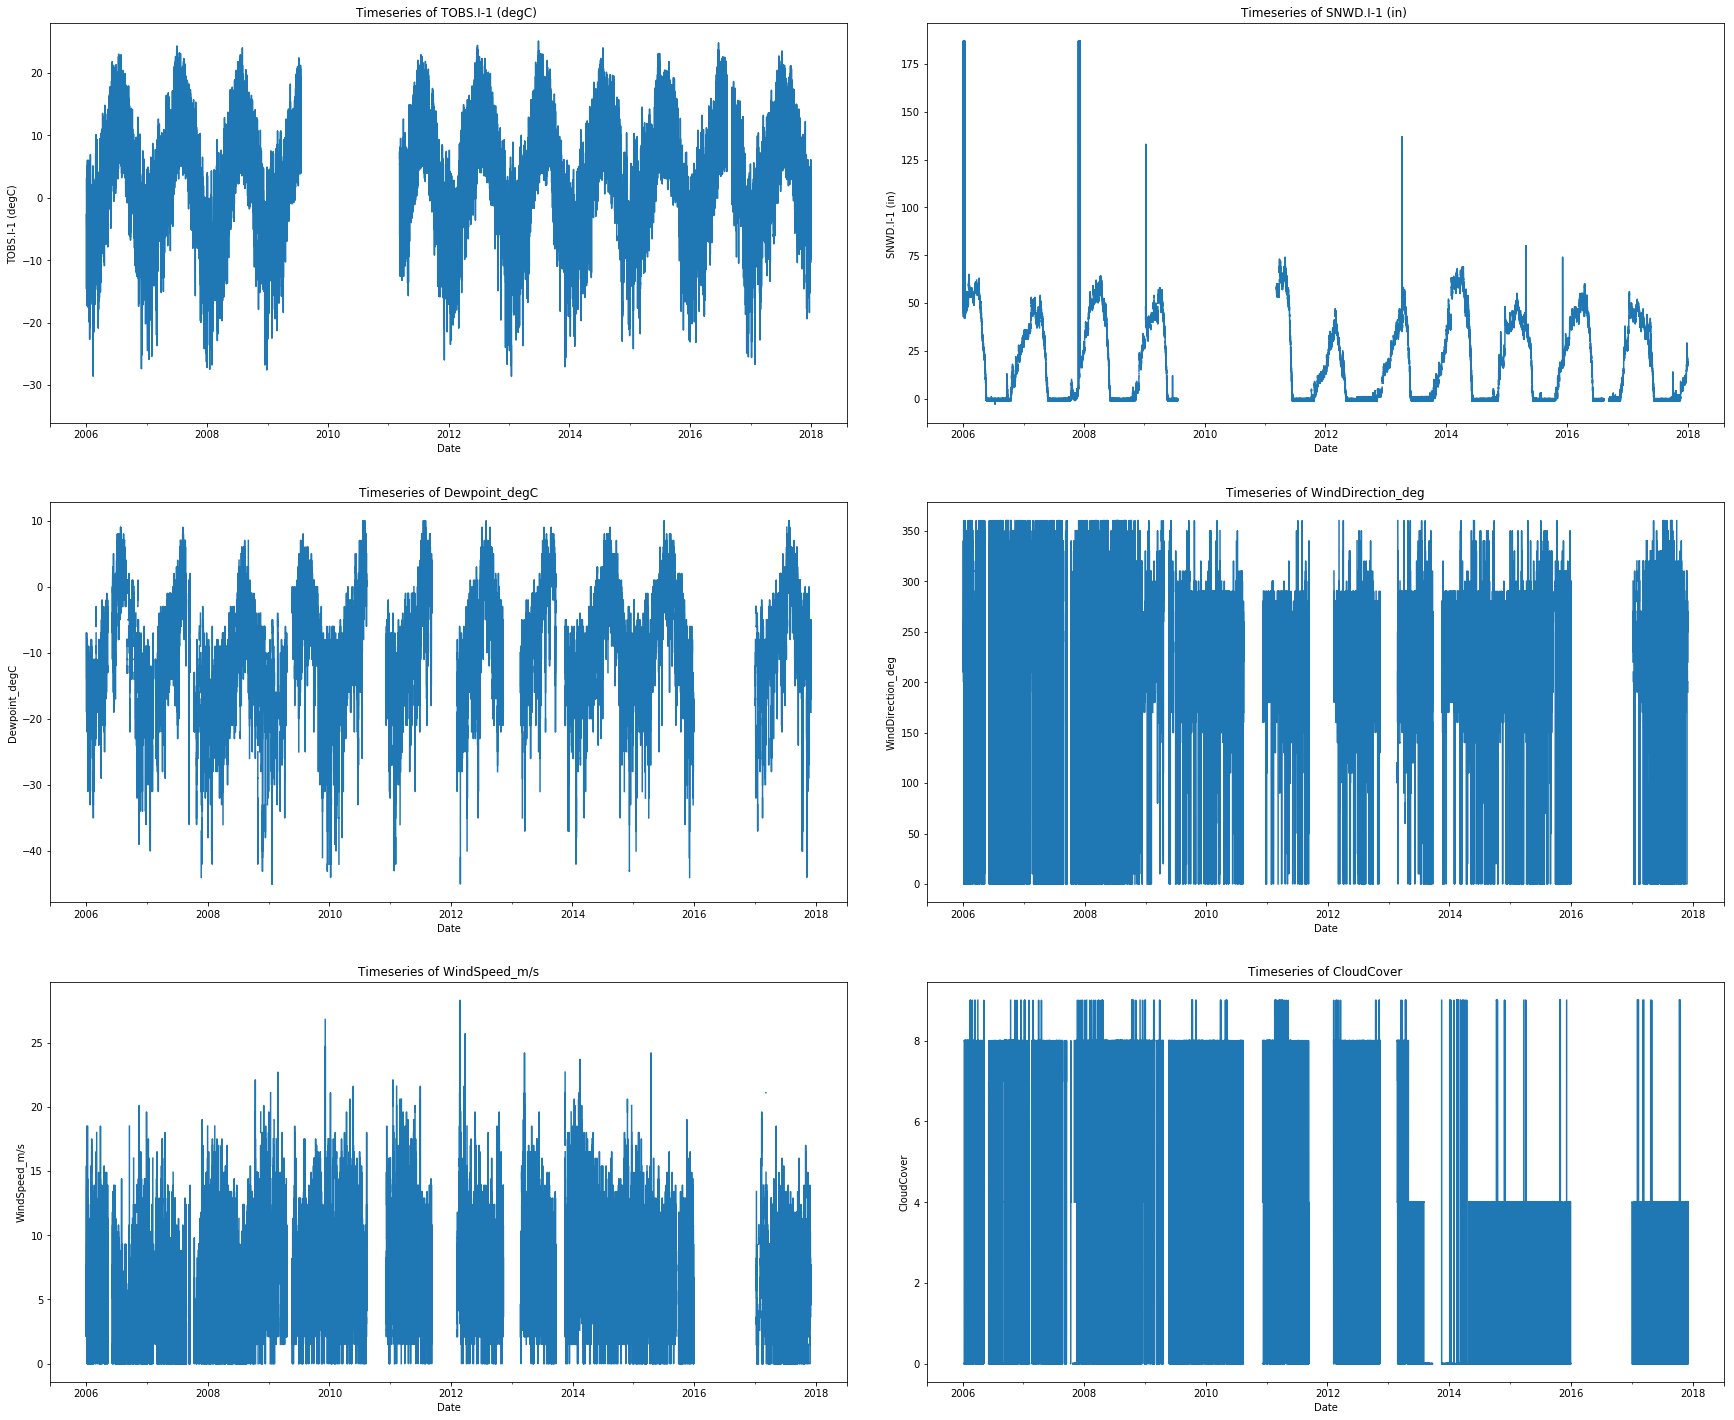

In [4]:
print(snotel_df['2006':'2017'].describe())
ax = None

#years = ['2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']
fig = plt.figure(figsize=(30,25))
fig.subplots_adjust(hspace=0.2, wspace=0.1)
for k in range(len(keys)):
    print(k)
    ax = plt.subplot(3, 2, k+1)
    print(ax)
    asos_snotel_df[keys[k]]['2006':'2017'].plot(linewidth=None, ax = ax, markersize = 0.00001)
    ax.set_xlabel("Date")
    ax.set_ylabel(keys[k])
    plt.title("Timeseries of " + keys[k])
  
#ax2 = snotel_df['TOBS.I-1 (degC) '].plot(use_index=True, secondary_y = True, marker='.', markersize = 0.25)
#ax2.set_ylabel("Observed Temperature (deg C)", rotation = -90)
    
#Create legend
#h1, l1 = ax1.get_legend_handles_labels()
#h2, l2 = ax2.get_legend_handles_labels()
#ax1.legend(h1+h2, l1+l2, loc=2)
      
#    plt.savefig('SNWD_TOBS_'+ '%04s' % (j) +'.png')

plt.show()

In [5]:
plt.figure(figsize=(15,5))

xx=(asos_snotel_df['SNWD.I-1 (in) ']<-100) | (asos_snotel_df['SNWD.I-1 (in) ']>100) | (asos_snotel_df['SNWD.I-1 (in) ']['2015']>70)
asos_snotel_df['SNWD.I-1 (in) '][xx]=np.NaN
#snotel_filled_df = snotel_df.interpolate(limit=3)


<Figure size 1080x360 with 0 Axes>

74.0


Text(0,0.5,'Snow Depth (inches)')

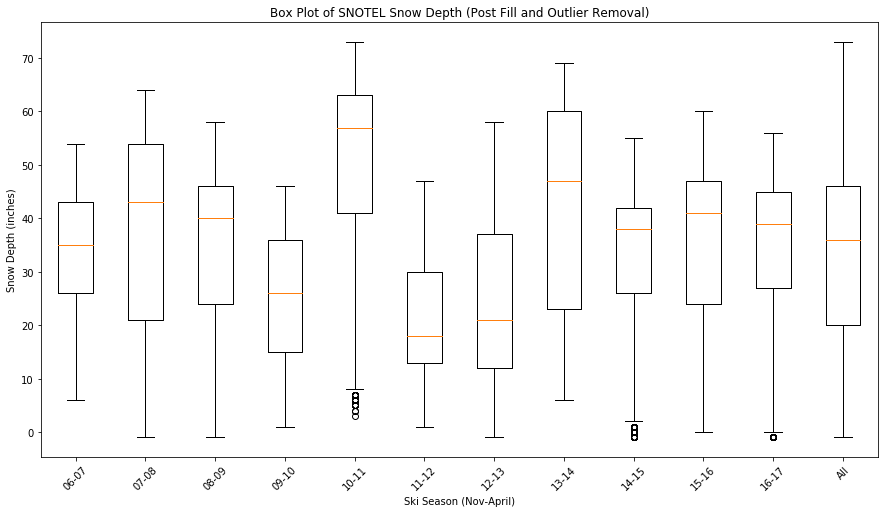

In [7]:
fig = plt.figure(figsize = (15,8))
ax = fig.add_subplot(111)
#fig.suptitle = 'Boxplot by Ski Season (November - April)'

filtered_data = asos_snotel_df['SNWD.I-1 (in) '][~np.isnan(asos_snotel_df['SNWD.I-1 (in) '])]


merged_seasons =  pd.concat([filtered_data['11-2006':'04-2007'], filtered_data['11-2007':'04-2008'], \
                 filtered_data['11-2008':'04-2009'],filtered_data['11-2009':'04-2010'],filtered_data['11-2010':'04-2011'], \
                 filtered_data['11-2011':'04-2012'],filtered_data['11-2012':'04-2013'],filtered_data['11-2013':'04-2014'], \
                 filtered_data['11-2014':'04-2015'],filtered_data['11-2015':'04-2016'],filtered_data['11-2016':'04-2017']], axis = 0)

filtered_data2 = [filtered_data['11-2006':'04-2007'], filtered_data['11-2007':'04-2008'], \
                 filtered_data['11-2008':'04-2009'],filtered_data['11-2009':'04-2010'],filtered_data['11-2010':'04-2011'], \
                 filtered_data['11-2011':'04-2012'],filtered_data['11-2012':'04-2013'],filtered_data['11-2013':'04-2014'], \
                 filtered_data['11-2014':'04-2015'],filtered_data['11-2015':'04-2016'],filtered_data['11-2016':'04-2017'], merged_seasons]
print(filtered_data.max())
plot =ax.boxplot(filtered_data2)
plt.title('Box Plot of SNOTEL Snow Depth (Post Fill and Outlier Removal)')
labels = ['06-07', '07-08', '08-09', '09-10', '10-11', '11-12', '12-13', '13-14', '14-15', '15-16', '16-17', 'All']
ax.set_xticklabels(labels, rotation = 45)
ax.set_xlabel('Ski Season (Nov-April)')
ax.set_ylabel('Snow Depth (inches)')

----

----


## Is there a correlation between snowfall and wind speed?

**First calculate 12-snowfall column by finding difference between 12-hr snow depth observations**

In [8]:
asos_snotel_df = asos_snotel_df.interpolate(limit=3)
#asos_snotel_df = pd.merge(snotel_filled_df, asos_filled_df, on='Date_Time', how='outer')
print(asos_snotel_df.describe())


       TOBS.I-1 (degC)   SNWD.I-1 (in)   Temperature_degC  Dewpoint_degC  \
count     114978.000000   106368.000000      79478.000000   79456.000000   
mean           1.229866       19.890344          1.520583      -8.996914   
std            9.159036       20.601696          9.263020       8.146294   
min          -33.100000       -3.000000        -28.000000     -45.000000   
25%           -5.200000        0.000000         -5.000000     -14.000000   
50%            1.200000       15.000000          1.000000      -9.000000   
75%            7.600000       38.000000          9.000000      -3.000000   
max           25.800000       74.000000         24.000000      10.000000   

       Pressure_hp  WindDirection_deg  WindSpeed_m/s    CloudCover  \
count          0.0       76570.000000   76570.000000  69000.000000   
mean           NaN         230.807768       6.139046      3.139153   
std            NaN          72.084638       3.443873      3.508731   
min            NaN           0.0000

count    9476.000000
mean       -0.000005
std         1.707898
min        -7.666667
25%        -1.000000
50%         0.000000
75%         1.000000
max        18.000000
Name: 12hr-SNOWFALL_in, dtype: float64
count    2743.000000
mean        0.842197
std         1.065792
min         0.200000
25%         0.300000
50%         0.485185
75%         0.974038
max        14.000000
Name: 1hr_Precipitation_mm, dtype: float64


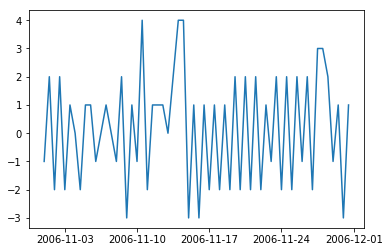

In [10]:

#Now calculate 12-snowfall column by finding difference between 12-hr snow depth observations 
asos_snotel_df['12hr_SNWD_in'] = asos_snotel_df['SNWD.I-1 (in) '].resample('12H').last()
asos_snotel_df['12hr-SNOWFALL_in'] = asos_snotel_df['12hr_SNWD_in']-asos_snotel_df['12hr_SNWD_in'].shift(+12)

print(asos_snotel_df['12hr-SNOWFALL_in'].describe())
print(asos_snotel_df['1hr_Precipitation_mm'].describe())
plt.plot(asos_snotel_df['12hr-SNOWFALL_in']['11-2006'].dropna())
plt.show()

Date_Time
2005-07-08 12:00:00    3.0
2005-07-23 12:00:00    3.0
2005-07-29 12:00:00    3.0
2005-10-06 12:00:00    3.0
2005-10-07 12:00:00    3.0
Name: 12hr-SNOWFALL_in, dtype: float64


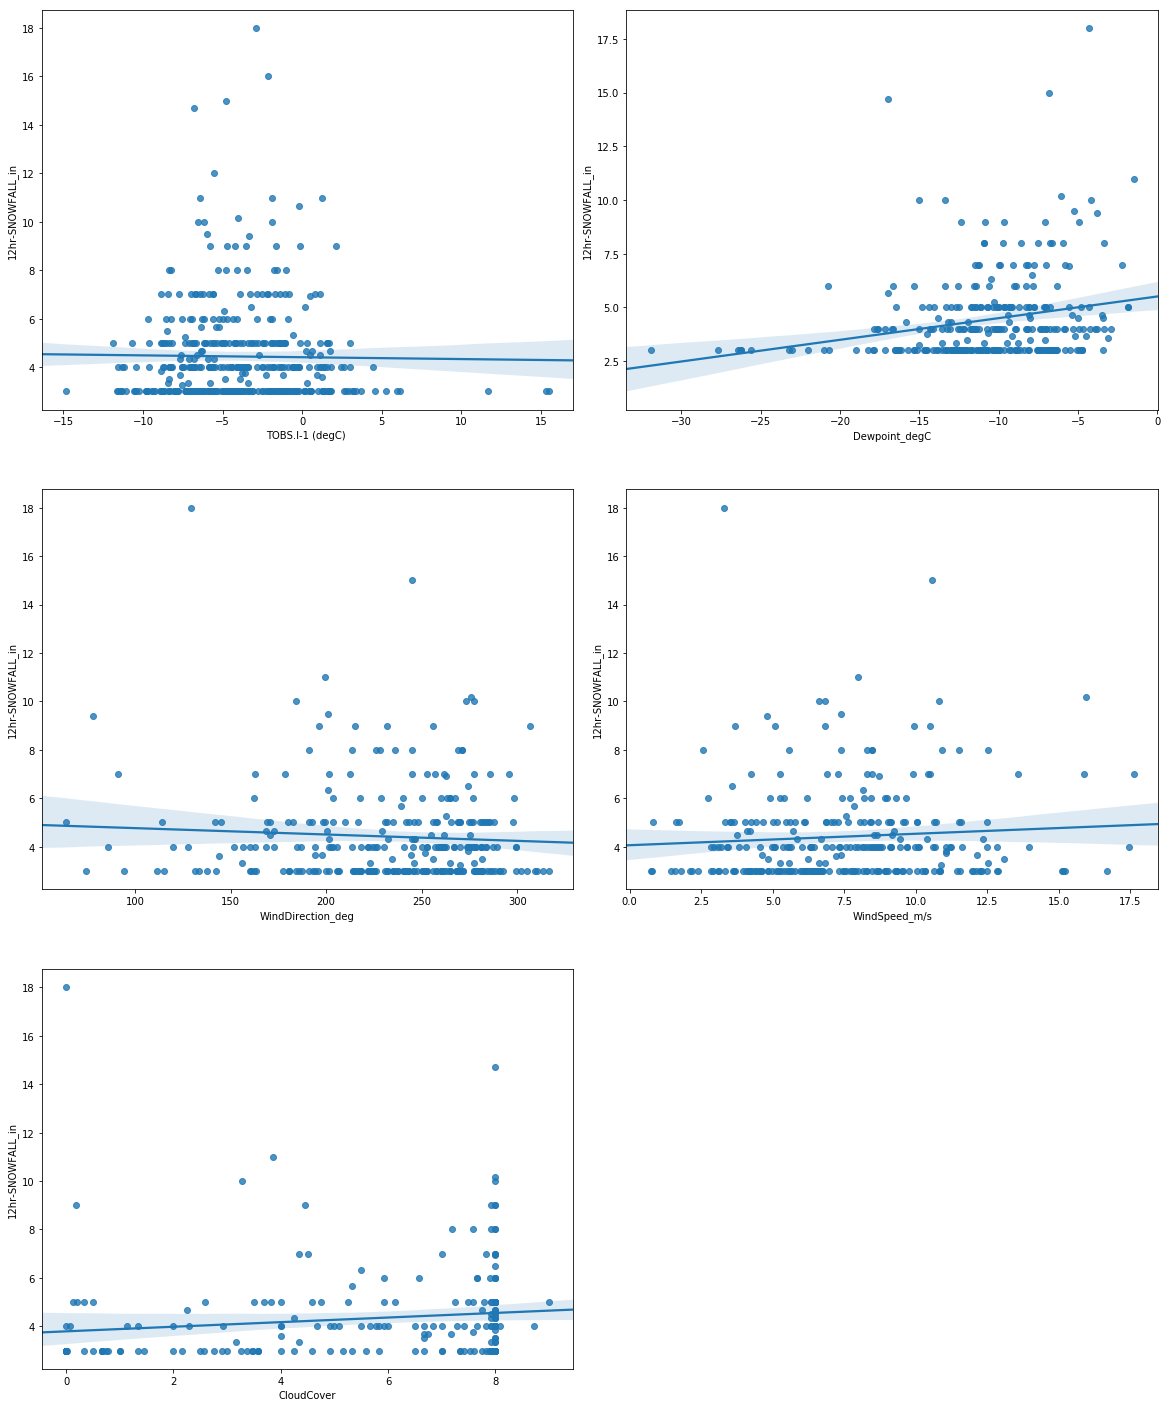

In [19]:
fig = plt.figure(figsize=(20,25))
fig.subplots_adjust(hspace=0.2, wspace=0.1)
yy = None
yy = (asos_snotel_df['12hr-SNOWFALL_in']>=3)
snf_df = asos_snotel_df['12hr-SNOWFALL_in'][yy]

keys = ['TOBS.I-1 (degC) ', 'Dewpoint_degC', 'WindDirection_deg', 'WindSpeed_m/s', 'CloudCover' ]

print(snf_df.head())

for k in range(len(keys)):
    plt.subplot(3,2,k+1)

    xx_df = asos_snotel_df[keys[k]].resample('12H').mean()

#print(ws_df, snf_df)

#snf_ws_df = pd.merge(sn, asos_filled_df, on='Date_Time', how='outer')
    idx = np.isfinite(xx_df) & np.isfinite(snf_df)
    sns.regplot(xx_df[idx], snf_df[idx])

plt.show()




----


## Is there a correlation between snowfall and cloud cover?

In [ ]:
plt.figure(figsize=(10,10))


yy = asos_snotel_df['12hr-SNOWFALL']>=3
snf_df = asos_snotel_df['12hr-SNOWFALL'][yy]

cc_df = asos_snotel_df['CloudCover'].resample('12H').mean()



idx = np.isfinite(cc_df) & np.isfinite(snf_df)

# Plot the snowfall vs temperature
_ = plt.plot(cc_df[idx], snf_df[idx], marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.ylabel('12 hour Snowfalls (inches)')
_ = plt.xlabel('12-hr Mean Cloud Cover (tenths)')


# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(cc_df[idx],snf_df[idx], 1)

# Print the results to the screen
print('slope =', a)
print('intercept =', b)

print(a,b)

# Make theoretical line to plot
x = np.array([np.min(cc_df[idx]),np.max(cc_df[idx])])
y = a * x + b
_ = plt.plot(x, y)

----


## Is there a correlation between snowfall and temperature?

In [ ]:
plt.figure(figsize=(10,10))



snf_df=asos_snotel_df['12hr-SNOWFALL']
snf_df[asos_snotel_df['12hr-SNOWFALL']<3] = np.NaN
temp_df = asos_snotel_df['Temperature_degC'].resample('12H').mean()



idx = np.isfinite(temp_df) & np.isfinite(snf_df)

# Plot the snowfall vs temperature
_ = plt.plot(temp_df[idx],snf_df[idx], marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.ylabel('12 hour Snowfalls (inches)')
_ = plt.xlabel('12-hr Mean Temperature (deg C)')


# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(temp_df[idx], snf_df[idx], 1)

# Print the results to the screen
print('slope =', a)
print('intercept =', b)


# Make theoretical line to plot
x = np.array([np.min(temp_df[idx]),np.max(temp_df[idx])])
y = a * x + b
_ = plt.plot(x, y)

----


## Is there a correlation between ASOS temperatures and SNOTEL temperatures?

In [ ]:
plt.figure(figsize=(10,10))

asos_temp_df=asos_snotel_df['Temperature_degC']
snotel_temp_df = asos_snotel_df['TOBS.I-1 (degC) ']



idx = np.isfinite(asos_temp_df) & np.isfinite(snotel_temp_df)

# Plot the snowfall vs temperature
_ = plt.plot(snotel_temp_df[idx], asos_temp_df[idx], marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.ylabel('ASOS Temperature (deg C)')
_ = plt.xlabel('SNOTEL temperature (deg C)')
_ = plt.xlim([-35, 25])
_ = plt.ylim([-35, 25])


# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(snotel_temp_df[idx], asos_temp_df[idx], 1)

# Print the results to the screen
print('slope =', a)
print('intercept =', b) 

print(a,b)

# Make theoretical line to plot
x = np.array([np.min(asos_temp_df[idx]),np.max(asos_temp_df[idx])])
y = a * x + b
_ = plt.plot(x, y)


## Seaborne joint plots

In [ ]:
import seaborn as sns
snf_df=asos_snotel_df['12hr-SNOWFALL']


df = bin_wd_df.join(snf_df)

df = df.dropna()
JG1 = sns.jointplot('WindDirection_deg_y', '12hr-SNOWFALL', data=df, kind='reg')
JG2 = sns.jointplot('WindDirection_deg_y', '12hr-SNOWFALL', data=df, kind='kde')

#subplots migration
f = plt.figure()
for J in [JG1, JG2]:
    for A in J.fig.axes:
        f._axstack.add(f._make_key(A), A)

#subplots size adjustment
f.axes[0].set_position([0.05, 0.05, 0.4,  0.4])
f.axes[1].set_position([0.05, 0.45, 0.4,  0.05])
f.axes[2].set_position([0.45, 0.05, 0.05, 0.4])
f.axes[3].set_position([0.55, 0.05, 0.4,  0.4])
f.axes[4].set_position([0.55, 0.45, 0.4,  0.05])
f.axes[5].set_position([0.95, 0.05, 0.05, 0.4])

## Seaborne pairplot

In [ ]:
df2 = asos_snotel_df.resample('12H').mean().loc[:, ['Temperature_degC','Dewpoint_degC','WindDirection_deg', 'WindSpeed_m/s', 'CloudCover', 'TOBS.I-1 (degC) ', 'SNWD.I-1 (in) ', '12hr-SNOWFALL' ]].dropna()
sns.pairplot(df2, diag_kind = "kde", kind = "reg")
plt.show()
print(df2.head())

# Exploring Wind Statistics

## Is there a correlation between Wind Direction and Snowfall?

In [ ]:

#Define variables
wd_df = None
bin_wd_df = pd.DataFrame()
bin_wd_df2 =  asos_snotel_df.copy()
#print(bin_wd_df2['11-2006'].head)
#wd_df = asos_snotel_df['WindDirection_deg']

#Define function for binning
def binning(col, cut_points, labels=None):
  #Define min and max values:
  minval = col.min()
  maxval = col.max()

  #create list by adding min and max to cut_points
  break_points = [minval] + cut_points + [maxval]

  #if no labels provided, use default labels 0 ... (n-1)
  if not labels:
    labels = range(len(cut_points)+1)

  #Binning using cut function of pandas
  colBin = pd.cut(col,bins=break_points,labels=labels,include_lowest=False)
  return colBin


#print(bin_wd_df2['WindDirection_deg']['11-2006'])

bin_wd_df2['WindDirection_deg'][(bin_wd_df2['WindDirection_deg'] >= 337.5) | (bin_wd_df2['WindDirection_deg'] < 22.5)] = 0
bin_wd_df2['WindDirection_deg'][(bin_wd_df2['WindDirection_deg'] >= 22.5) & (bin_wd_df2['WindDirection_deg'] < 67.5)] = 45
bin_wd_df2['WindDirection_deg'][(bin_wd_df2['WindDirection_deg'] >= 67.5) & (bin_wd_df2['WindDirection_deg'] < 112.5)] = 90
bin_wd_df2['WindDirection_deg'][(bin_wd_df2['WindDirection_deg'] >= 112.5) & (bin_wd_df2['WindDirection_deg'] < 157.5)] = 135
bin_wd_df2['WindDirection_deg'][(bin_wd_df2['WindDirection_deg'] >= 157.5) & (bin_wd_df2['WindDirection_deg'] < 202.5)] = 180
bin_wd_df2['WindDirection_deg'][(bin_wd_df2['WindDirection_deg'] >= 202.5) & (bin_wd_df2['WindDirection_deg'] < 247.5)] = 225
bin_wd_df2['WindDirection_deg'][(bin_wd_df2['WindDirection_deg'] >= 247.5) & (bin_wd_df2['WindDirection_deg'] < 292.5)] = 270
bin_wd_df2['WindDirection_deg'][(bin_wd_df2['WindDirection_deg'] >= 292.5) & (bin_wd_df2['WindDirection_deg'] < 337.5)] = 315

print(asos_snotel_df['WindDirection_deg']['2007-02-16'])



In [ ]:
snf_df = None
bin_snf_df = None
yy = None

#snf_df[yy] = 0
#print(asos_snotel_df['12hr-SNOWFALL'])
bin_snf_df = asos_snotel_df[['12hr-SNOWFALL']].copy()
snf_df = asos_snotel_df[['12hr-SNOWFALL']].copy()

yy = (bin_snf_df['12hr-SNOWFALL']<3)
bin_snf_df['12hr-SNOWFALL'][yy] = np.NaN
snf_df['12hr-SNOWFALL'][yy] = np.NaN

bin_snf_df[(snf_df['12hr-SNOWFALL'] >= 3.0) & (snf_df['12hr-SNOWFALL'] <5.5)] = 4
bin_snf_df[(snf_df['12hr-SNOWFALL'] >= 5.5) & (snf_df['12hr-SNOWFALL'] < 7.5)] = 6
bin_snf_df[(snf_df['12hr-SNOWFALL'] >= 7.5) & (snf_df['12hr-SNOWFALL'] < 9.5)] = 8
bin_snf_df[(snf_df['12hr-SNOWFALL'] >= 9.5)] = 10

bin_snf_df.columns = ['12hr-SNOWFALL_bin']
print(bin_snf_df['02-2007'].dropna())
#bin_wd_df2['WindDirection_deg'][(bin_wd_df2['WindDirection_deg'] >= 22.5) & (bin_wd_df2['WindDirection_deg'] < 67.5)] = 45
#bin_wd_df2['WindDirection_deg'][(bin_wd_df2['WindDirection_deg'] >= 67.5) & (bin_wd_df2['WindDirection_deg'] < 112.5)] = 90
#bin_wd_df2['WindDirection_deg'][(bin_wd_df2['WindDirection_deg'] >= 112.5) & (bin_wd_df2['WindDirection_deg'] < 157.5)] = 135

In [ ]:
import windrose as wr

ws_df = None
ws_df1 = None
ws_df2 = None
wd_df1 = None
wd_df2 = None
wd_df = None
df = None

#Put categorical data from function output in a varable bin_wd_df




years = ['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']
x = '2006'

print('11-' +str(int(years[0])+1))

print(range(len(years)))

from scipy.stats import mode


#    OnBitSeq  KMeans
# 0         1       5
# 1         2       3
# 2         3       5
# 3         2       4
# 4         2       3
# 5         1       4
# 6         1       5


for k in range(len(years)):
    #print(str(int(years[k])+1))
    #plt.subplot(4, 3, k+1)
    
    wd_df1 = bin_wd_df2['WindDirection_deg'][(bin_wd_df2['WindDirection_deg'].index.month >= 11) & \
                                                (bin_wd_df2['WindDirection_deg'].index.year == int(years[k]))].resample('12H').apply(lambda x: mode(x)[0][0]) #.reset_index()
    wd_df2 = bin_wd_df2['WindDirection_deg'][(bin_wd_df2['WindDirection_deg'].index.month <= 4) & \
                                               (bin_wd_df2['WindDirection_deg'].index.year == int(years[k])+1)].resample('12H').apply(lambda x: mode(x)[0][0])  #.resample('12H').mid()
    
    wd_df = pd.concat([wd_df1, wd_df2])
  
    
    
    
    ws_df1 = asos_snotel_df['WindSpeed_m/s'][(asos_snotel_df['WindSpeed_m/s'].index.month >= 11) & \
                                                (asos_snotel_df['WindSpeed_m/s'].index.year == int(years[k]))].resample('12H').mean().round()  #reset_index()
    ws_df2 = asos_snotel_df['WindSpeed_m/s'][(asos_snotel_df['WindSpeed_m/s'].index.month <= 4) & \
                                                (asos_snotel_df['WindSpeed_m/s'].index.year == int(years[k])+1)].resample('12H').mean().round()  #.resample('12H').mid()
    
     
    ws_df = pd.concat([ws_df1, ws_df2])

    
    snf_rs1 = bin_snf_df[(bin_snf_df.index.month >= 11) & (bin_snf_df.index.year == int(years[k]))]
    snf_rs2 = bin_snf_df[(bin_snf_df.index.month <= 4) & (bin_snf_df.index.year == int(years[k])+1)]
    #snf_rs =snf_rs1.to_frame().join(snf_rs2.to_frame(), right_index=True, left_index=True,how='outer').resample('1H').interpolate(limit=12).resample('H', how = 'min')
    snf_rs = pd.concat([snf_rs1, snf_rs2])
    print(snf_rs.head())



    
    #print(snf_rs1.head())
    
    #wd_df = wd_df1.to_frame().join(wd_df2.to_frame(), right_index=True, left_index=True,how='outer')
    
    
    #df = wd_df.to_frame().merge(snf_rs.to_frame(), right_index=True, left_index=True,how='outer').dropna()
    df1 = wd_df.to_frame().merge(ws_df.to_frame(), right_index=True, left_index=True,how='outer')
    print(df1.head())
    df = df1.merge(snf_rs, right_index=True, left_index=True,how='outer')


    
    areas = df.groupby(['WindDirection_deg', 'WindSpeed_m/s', '12hr-SNOWFALL_bin']).size().reset_index(name='counts')
    print(areas)
    #g1 = (areas['12hr-SNOWFALL_bin'] == '3-5')
    #print(g1)
    #print(areas[g1].head(50))
    #print(areas[g1]['counts'].head())
    #print(areas['WindDirection_deg'][g1].head())
    
    # df = df2.merge(df1, right_index = True, left_index = True, how = 'outer').dropna()
   
    #print(df.describe())
   # print(df.head(50))
    

      #idx = np.isfinite(wd_df) & np.isfinite(snf_rs)
    
    #ax.bar(asos_snotel_df['WindDirection_deg']["'%s'":%s'" % (strt, end)][idx], snf_df["'%s:%s'" % (strt, end)][idx], normed=True, opening=0.8, edgecolor='white')
    fig = plt.figure(figsize=(10,16))
    ax = fig.add_subplot(111, projection='polar')
    plt.figsize = (5,8)
    #ax.bar(df['WindDirection_deg'], df['12hr-SNOWFALL'], normed=True, bins=np.arange(3, 18, 3), opening=0.8, edgecolor='white')
    #ax.scatter(df['WindDirection_deg'], df['12hr-SNOWFALL'])
   
    
    #categories = np.unique(df['12hr-SNOWFALL_bin'])
    #colors = np.linspace(0, 1, len(categories))
    #colordict = dict(zip(categories, colors))
    #df["Color"] = df[catcol].apply(lambda x: colordict[x])
    
    #plt.scatter(x, y, s=areas * 3, alpha=0.5)
    ax.scatter(np.radians(areas['WindDirection_deg']), areas['WindSpeed_m/s'], s = areas['counts']*150, c = areas['12hr-SNOWFALL_bin'], cmap='rainbow_r', vmin=3, vmax=10, alpha = 0.55)
    #   #ax.bar(df['WindDirection_deg'], df['WIndSpeed_m/s'], normed=True bins=np.arange(3, 18, 3), opening=0.8, edgecolor='white')
    #ax.contour(df['WindDirection_deg'], df['WindSpeed_m/s'], bins=np.arange(3, 18, 5), normed=True, lw=3)
   #plt.ylabel("% of occurence")
    plt.title("Ski Season Snowfall by Wind Direction: "+ str(int(years[k])-1) + "-"+ years[k])

    
   # ax.set_legend(title = 'Snowfall (inches)')
    plt.show()
    
    
    #plt.scatter(areas['WindDirection_deg'][g1], areas['WindSpeed_m/s'][g1], s = areas['counts'][g1]*100, alpha = 0.25)
    #plt.show()


In [ ]:
print(col)

## Wind Rose with windrose

In [ ]:
import windrose as wr

ws_df = None
ws_df1 = None
ws_df2 = None
wd_df1 = None
wd_df2 = None
wd_df = None
df = None

yy = asos_snotel_df['12hr-SNOWFALL']<3
snf_df[yy] = 0

fig = plt.figure(figsize=(5,8))
years = ['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']
x = '2006'

print('11-' +str(int(years[0])+1))

print(range(len(years)))

from scipy.stats import mode


#    OnBitSeq  KMeans
# 0         1       5
# 1         2       3
# 2         3       5
# 3         2       4
# 4         2       3
# 5         1       4
# 6         1       5



for k in range(len(years)):
    #print(str(int(years[k])+1))
    #plt.subplot(4, 3, k+1)
    
    wd_df1 = asos_snotel_df['WindDirection_deg'][(asos_snotel_df['WindDirection_deg'].index.month >= 11) & \
                                                (asos_snotel_df['WindDirection_deg'].index.year == int(years[k]))].resample('12H').apply(lambda x: mode(x)[0][0])  #.reset_index()
    wd_df2 = asos_snotel_df['WindDirection_deg'][(asos_snotel_df['WindDirection_deg'].index.month <= 4) & \
                                                (asos_snotel_df['WindDirection_deg'].index.year == int(years[k])+1)].resample('12H').apply(lambda x: mode(x)[0][0])  #.resample('12H').mid()
    
    wd_df = pd.concat([wd_df1, wd_df2])
    
    
    
    ws_df1 = asos_snotel_df['WindSpeed_m/s'][(asos_snotel_df['WindSpeed_m/s'].index.month >= 11) & \
                                                (asos_snotel_df['WindSpeed_m/s'].index.year == int(years[k]))].resample('12H').mean().round()  #reset_index()
    ws_df2 = asos_snotel_df['WindSpeed_m/s'][(asos_snotel_df['WindSpeed_m/s'].index.month <= 4) & \
                                                (asos_snotel_df['WindSpeed_m/s'].index.year == int(years[k])+1)].resample('12H').mean().round()  #.resample('12H').mid()
    
     
    ws_df = pd.concat([ws_df1, ws_df2])

    
    snf_rs1 = snf_df[(snf_df.index.month >= 11) & (snf_df.index.year == int(years[k]))].resample('1H').interpolate(limit=12).resample('H', how = 'mean').round()
    snf_rs2 = snf_df[(snf_df.index.month <= 4) & (snf_df.index.year == int(years[k])+1)].resample('1H').interpolate(limit=12).resample('H', how = 'mean').round()
    #snf_rs =snf_rs1.to_frame().join(snf_rs2.to_frame(), right_index=True, left_index=True,how='outer').resample('1H').interpolate(limit=12).resample('H', how = 'min')
    snf_rs = pd.concat([snf_rs1, snf_rs2])
    
    #print(snf_rs1.head())
    
    #wd_df = wd_df1.to_frame().join(wd_df2.to_frame(), right_index=True, left_index=True,how='outer')
    
    
    #df = wd_df.to_frame().merge(snf_rs.to_frame(), right_index=True, left_index=True,how='outer').dropna()
    df1 = wd_df.to_frame().merge(snf_rs.to_frame(), right_index=True, left_index=True,how='outer')
    df = df1.merge(ws_df.to_frame(), right_index = True, left_index = True, how = 'outer').dropna()
    
    #print(df.describe())
   # print(df.head(50))
    

      #idx = np.isfinite(wd_df) & np.isfinite(snf_rs)
    
    #ax.bar(asos_snotel_df['WindDirection_deg']["'%s'":%s'" % (strt, end)][idx], snf_df["'%s:%s'" % (strt, end)][idx], normed=True, opening=0.8, edgecolor='white')
    #ax = wr.WindroseAxes.from_ax()
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='polar')
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='polar')
    theta = 2 * np.pi
    plt.figsize = (5,8)
    #ax.bar(df['WindDirection_deg'], df['12hr-SNOWFALL'], normed=True, bins=np.arange(3, 18, 3), opening=0.8, edgecolor='white')
    #ax.scatter(df['WindDirection_deg'], df['12hr-SNOWFALL'])
    areas = df.groupby(['WindDirection_deg', 'WindSpeed_m/s', '12hr-SNOWFALL']).size()
    print(areas.head(50))
    #plt.scatter(x, y, s=areas * 3, alpha=0.5)
    ax.scatter(np.radians(df['WindDirection_deg']), df['WindSpeed_m/s'], s = areas*100, alpha = 0.5)
    #ax.bar(df['WindDirection_deg'], df['WIndSpeed_m/s'], normed=True, bins=np.arang(3, 18, 3), opening=0.8, edgecolor='white')
    #ax.contour(df['WindDirection_deg'], df['WindSpeed_m/s'], bins=np.arange(3, 18, 5), normed=True, lw=3)
   #plt.ylabel("% of occurence")
    plt.title("Ski Season Snowfall by Wind Direction: "+ str(int(years[k])-1) + "-"+ years[k])

    
    #ax.set_legend(title = 'Snowfall (inches)')
    plt.show()


In [ ]:
#hist, bin = np.histogram(asos_snotel_df['WindDirection_deg'], 8,[ 0,360]) 
hist, bin = np.histogram(snf_df, 8,[ 0,24]) 
print(hist)
print(hist)
showRoseWind(hist, 'Copper Mtn Wind Direction Counts', 200000)

#Nelli, Fabio. Python Data Analytics: Data Analysis and Science using pandas, matplotlib and the Python Programming Language (Kindle Locations 6399-6401). Apress. Kindle Edition. 

def showRoseWind(values, city_name, max_value):
    N = 8
    theta = np.arange( 0., 2 * np.pi, 2 * np.pi / N)
    radii = np.array(values)
    print(radii)
    plt.axes([ 0.025, 0.025, 0.95, 0.95], polar = True)
    colors = [( 1-x/max_value, 1-x/max_value, 0.75) for x in radii]
    plt.bar( theta, radii, width =( 2* np.pi/ N), bottom = 0.0, color = colors)
    #plt.bar( theta, snf_df)
    plt.title( city_name, x = 0.2, fontsize = 20)

#Nelli, Fabio. Python Data Analytics: Data Analysis and Science using pandas, matplotlib and the Python Programming Language (Kindle Locations 6381-6386). Apress. Kindle Edition. 

In [ ]:
def showRoseWind(values, city_name, max_value):
    N = 8
    theta = np.arange( 0., 2 * np.pi, 2 * np.pi / N)
    radii = np.array(values)
    print(radii)
    plt.axes([ 0.025, 0.025, 0.95, 0.95], polar = True)
    colors = [( 1-x/max_value, 1-x/max_value, 0.75) for x in radii]
    plt.bar( theta, radii, width =( 2* np.pi/ N), bottom = 0.0, color = colors)
    #plt.bar( theta, snf_df)
    plt.title( city_name, x = 0.2, fontsize = 20)

#Nelli, Fabio. Python Data Analytics: Data Analysis and Science using pandas, matplotlib and the Python Programming Language (Kindle Locations 6381-6386). Apress. Kindle Edition. 

In [ ]:

from scipy.interpolate import griddata

#create 5000 Random points distributed within the circle radius 100
max_r = 100
max_theta = 2.0 * np.pi
number_points = 5000
points = [[bin_wd_df2], [ws_df]] #np.random.rand(number_points,2)*[max_r,max_theta]
print(points)

#Some function to generate values for these points, 
#this could be values = np.random.rand(number_points)
values = points[:,0] * np.sin(points[:,1])* np.cos(points[:,1])

#now we create a grid of values, interpolated from our random sample above
theta = wd_df #np.linspace(0.0, max_theta, 100)
r =ws_df # np.linspace(0, max_r, 200)
grid_r, grid_theta = np.meshgrid(r, theta)
data = griddata(points, values, (grid_r, grid_theta), method='cubic',fill_value=0)

#Create a polar projection
ax1 = plt.subplot(projection="polar")
ax1.pcolormesh(theta,r,data.T)
plt.show()

import matplotlib.pyplot as plt

R=0.5
#r = np.linspace(R,5,10)
#theta = np.linspace(0,2*np.pi,145)
#radius_matrix, theta_matrix = np.meshgrid(r,theta)
#ax = plt.subplot(111, polar=True)
#ax.plot(theta_matrix, radius_matrix, color='r', ls='none', marker='.')

r = ws_df['11-2006']
theta =wd_df['11-2006']
radius_matrix, theta_matrix = np.meshgrid(r,theta)
ax = plt.subplot(111, polar=True)
ax.plot(theta_matrix, radius_matrix, color='r', ls='none', marker='.')


In [ ]:
from scipy.stats import mode
import windrose as wr

#wd_df1 = bin_wd_df['WindDirection_deg_y'].resample('12H').apply(lambda x: mode(x)[0][0])
wd_df1 = bin_wd_df2.resample('12H').apply(lambda x: mode(x)[0][0])



#Only keep non NaN values                         
idx = np.isfinite(wd_df1) & np.isfinite(df['12hr-SNOWFALL'])

ws_df = asos_snotel_df['WindSpeed_m/s'].resample('12H').mean()
idx2 = np.isfinite(ws_df) & np.isfinite(wd_df1)

print(ws_df[idx2].describe())
print(wd_df1[idx2].describe())

ax = wr.WindroseAxes.from_ax()
plt.figsize = (5,8)
#ax.bar(wd_df1[idx], df['12hr-SNOWFALL'][idx], bins=np.arange(3, 18, 3), opening=0.8, edgecolor='white')
ax.bar(wd_df1[idx2], ws_df[idx2], bins=np.arange(3, 18, 3), opening=0.8, edgecolor='white')
#ax.scatter(wd_df1[idx], df['12hr-SNOWFALL'][idx])
ax.scatter(wd_df1[idx], df['12hr-SNOWFALL'][idx])
    #ax.bar(df['WindDirection_deg'], df['WIndSpeed_m/s'], normed=True, bins=np.arange(3, 18, 3), opening=0.8, edgecolor='white')
#ax.contour(wd_df1[idx2], ws_df[idx2], bins=np.arange(0, 20, 5), normed=True, lw=3)
   #plt.ylabel("% of occurence")
plt.title("Ski Season Snowfall by Wind Direction: "+ str(int(years[k])-1) + "-"+ years[k])

    
ax.set_legend(title = 'Snowfall (inches)')
plt.show()


In [ ]:
import cmath as cmath
import math

In [ ]:
def r_wind_new(n_rwd, rrdd, rwnd):
    wind_vector_sum = None
 
    if n_rwd > 2:
        for i in range(0, n_rwd):
            wind_polar = cmath.rect(rwnd[i], rrdd[i] - math.pi)
            if wind_vector_sum is None:
                wind_vector_sum = wind_polar
            else:
                wind_vector_sum += wind_polar
 
        r, phi = cmath.polar(wind_vector_sum / n_rwd)
 
        rwdir = int(round(int(round(math.degrees(phi) % 360)) / 10.0))
        rwspd = int(round(r*10))/10.0
    else:
        return None, None
 
    return '%2i' % rwdir, '%#5.1f' % rwspd

In [ ]:
print(r_wind_new(len(asos_snotel_df['WindDirection_deg']), [math.radians(asos_snotel_df['WindDirection_deg']+180)], asos_snotel_df['WindSpeed_m/s']))

In [ ]:
month = asos_snotel_df[asos_snotel_df.index.month==2]
print(month)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

idx = np.isfinite(asos_snotel_df['WindDirection_deg']['11-2008':'04-2009']) & np.isfinite(snf_df['11-2008':'04-2009'])


theta = np.radians(asos_snotel_df['WindDirection_deg']['11-2008':'04-2009'][idx])  #np.linspace(0,2*np.pi)
r = np.linspace(2,18,9)
print(r)


Theta, R = np.meshgrid(theta, r)
print(R)
print(np.degrees(Theta))
C = snf_df['11-2008':'04-2009'][idx] #np.sinc(Theta-2)+(5-np.sqrt(R))+np.random.rand(len(r),len(theta))
#C = np.ma.masked_less_equal(C,2)

fig, ax = plt.subplots(subplot_kw={"projection":"polar"})

ax.pcolormesh(Theta, R, C, vmin=2, vmax=5)

#asos_snotel_df['WindDirection_deg']['11-2008':'04-2009'], snf_df['11-2008':'04-2009']
plt.show()